# Going Deeper
> By the end of this chapter, you will know how to solve binary, multi-class, and multi-label problems with neural networks. All of this by solving problems like detecting fake dollar bills, deciding who threw which dart at a board, and building an intelligent system to water your farm. You will also be able to plot model training metrics and to stop training and save your models when they no longer improve. This is the Summary of lecture "Introduction to Deep Learning with Keras", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Tensorflow-Keras, Deep_Learning]
- image: 

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 8)

## Binary Classification

### Exploring dollar bills
You will practice building classification models in Keras with the Banknote Authentication dataset.

Your goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 features: `variance`,`skewness`,`curtosis` and `entropy`. These features are calculated by applying mathematical operations over the dollar bill images. The labels are found in the dataframe's `class` column.
![dollar](image/dollar_bills.png)

In [20]:
banknotes = pd.read_csv('./dataset/banknotes.csv')
banknotes.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [21]:
# Normlize the data
X = banknotes.iloc[:, :4]
X = ((X - X.mean()) / X.std()).to_numpy()
y = banknotes['class'].to_numpy()

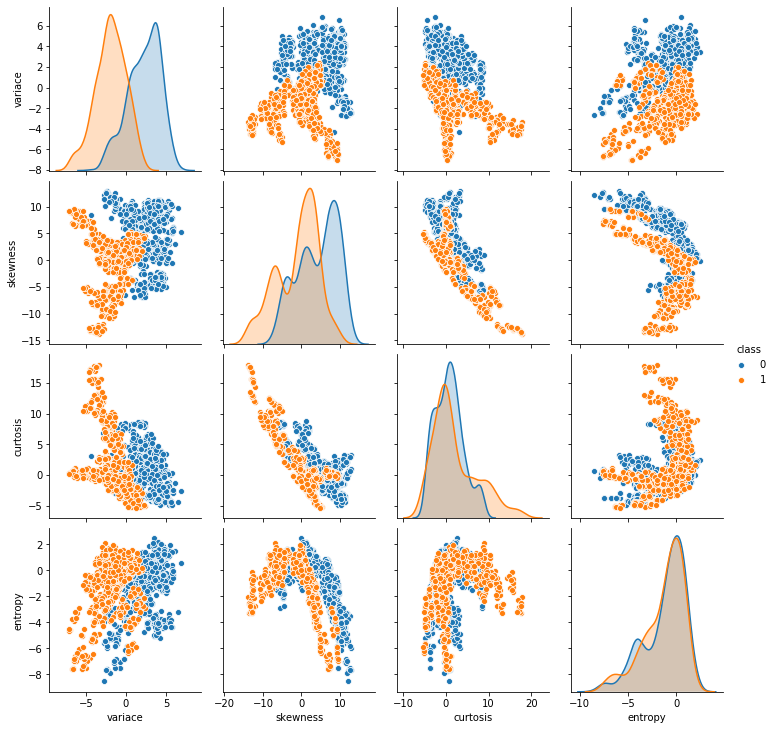

In [22]:
# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class');

In [23]:
# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

Dataset stats: 
            variace     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 0    762
1    610
Name: class, dtype: int64


Your pairplot shows that there are features for which the classes spread out noticeably. This gives us an intuition about our classes being easily separable. Let's build a model to find out what it can do!

### A binary classification model
Now that you know what the Banknote Authentication dataset looks like, we'll build a simple model to distinguish between real and fake bills.

You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we have 4 features in our dataset. The model's output will be a value constrained between 0 and 1.

We will interpret this output number as the probability of our input variables coming from a fake dollar bill, with 1 meaning we are certain it's a fake bill.
![binary_nn](image/model_chapter2_binary_classification.jpeg)

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer
model.add(Dense(1, input_shape=(4, ), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


### Is this dollar bill fake ?
You are now ready to train your model and check how well it performs when classifying new bills!

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [26]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs=20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy: ', accuracy)

Epoch 1/20
33/33 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7366
Epoch 2/20
33/33 [==============================] - 0s 1ms/step - loss: 0.5052 - accuracy: 0.7493
Epoch 3/20
33/33 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.7619
Epoch 4/20
33/33 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7707
Epoch 5/20
33/33 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.7765
Epoch 6/20
33/33 [==============================] - 0s 1ms/step - loss: 0.4589 - accuracy: 0.7862
Epoch 7/20
33/33 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.7940
Epoch 8/20
33/33 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.7998
Epoch 9/20
33/33 [==============================] - 0s 994us/step - loss: 0.4308 - accuracy: 0.8056
Epoch 10/20
33/33 [==============================] - 0s 992us/step - loss: 0.4223 - accuracy: 0.8115
Epoch 11/20
33/

## Multi-class classification

### A multi-class model
You're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's x and y coordinates on the board.)

This problem is a multi-class classification problem since each dart can only be thrown by one of 4 competitors. So classes/labels are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use the `softmax` activation function to achieve a total sum of probabilities of 1 over all competitors.

In [27]:
darts = pd.read_csv('./dataset/darts.csv')
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


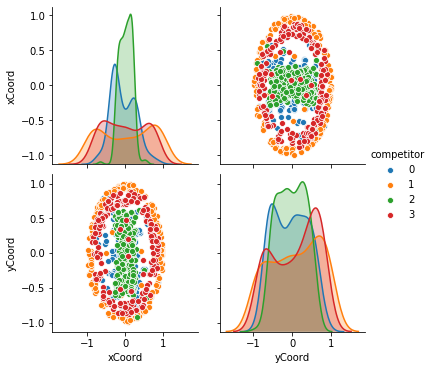

In [40]:
sns.pairplot(darts, hue='competitor');

In [28]:
# Instantiate a sequential model
model = Sequential()

# Add 3 dense layers of 128, 64, 32, neurons each
model.add(Dense(128, input_shape=(2, ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))

# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Prepare your dataset
In the console you can check that your labels, `darts.competitor` are not yet in a format to be understood by your network. They contain the names of the competitors as strings. You will first turn these competitors into unique numbers,then use the `to_categorical()` function from `tf.keras.utils` to turn these numbers into their one-hot encoded representation.

This is useful for multi-class classification problems, since there are as many output neurons as classes and for every observation in our dataset we just want one of the neurons to be activated.

In [30]:
from tensorflow.keras.utils import to_categorical

# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes

# Print the label encoded competitors
print('Label encoded competitors: \n', darts.competitor.head())

coordinates = darts.drop(['competitor'], axis=1)

# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n', competitors)

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8
One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


Each competitor is now a vector of length 4, full of zeroes except for the position representing her or himself.

### Training on dart throwers
Your model is now ready, just as your dataset. It's time to train!

The `coordinates` features and `competitors` labels you just transformed have been partitioned into `coord_train`,`coord_test` and `competitors_train`,`competitors_test`.

Let's find out who threw which dart just by looking at the board!

In [31]:
coordinates = darts[['xCoord', 'yCoord']]
coordinates.head()

,xCoord,yCoord
0,0.196451,-0.520341
1,0.476027,-0.306763
2,0.003175,-0.980736
3,0.294078,0.267566
4,-0.051120,0.598946


In [33]:
coord_train, coord_test, competitors_train, competitors_test = \
    train_test_split(coordinates, competitors, test_size=0.25, stratify=competitors)

In [34]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 132       
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Fit your model to the training data for 200 epochs
model.fit(coord_train, competitors_train, epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/200
19/19 [==============================] - 0s 1ms/step - loss: 1.3651 - accuracy: 0.2633
Epoch 2/200
19/19 [==============================] - 0s 1ms/step - loss: 1.3217 - accuracy: 0.2833
Epoch 3/200
19/19 [==============================] - 0s 1ms/step - loss: 1.2749 - accuracy: 0.3517
Epoch 4/200
19/19 [==============================] - 0s 1ms/step - loss: 1.2193 - accuracy: 0.4267
Epoch 5/200
19/19 [==============================] - 0s 1ms/step - loss: 1.1547 - accuracy: 0.4900
Epoch 6/200
19/19 [==============================] - 0s 1ms/step - loss: 1.0779 - accuracy: 0.5767
Epoch 7/200
19/19 [==============================] - 0s 1ms/step - loss: 0.9940 - accuracy: 0.6383
Epoch 8/200
19/19 [==============================] - 0s 1ms/step - loss: 0.9195 - accuracy: 0.6083
Epoch 9/200
19/19 [==============================] - 0s 1ms/step - loss: 0.8769 - accuracy: 0.6733
Epoch 10/200
19/19 [==============================] - 0s 1ms/step - loss: 0.8338 - accuracy: 0.6967
Epoch 11/

Epoch 83/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5769 - accuracy: 0.8017
Epoch 84/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.8017
Epoch 85/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.8067
Epoch 86/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.8083
Epoch 87/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.8083
Epoch 88/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5771 - accuracy: 0.8000
Epoch 89/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5749 - accuracy: 0.8017
Epoch 90/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.7983
Epoch 91/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5638 - accuracy: 0.8133
Epoch 92/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5769 - accuracy: 0.8067


19/19 [==============================] - 0s 1ms/step - loss: 0.5649 - accuracy: 0.7950
Epoch 165/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5626 - accuracy: 0.7967
Epoch 166/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 0.8083
Epoch 167/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5265 - accuracy: 0.8117
Epoch 168/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.8167
Epoch 169/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.8067
Epoch 170/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.8150
Epoch 171/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5198 - accuracy: 0.8133
Epoch 172/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.8100
Epoch 173/200
19/19 [==============================] - 0s 1ms/step - loss: 0.5174 - accuracy: 0.8200
Epoc

### Softmax predictions
This model is generalizing well!, that's why you got a high accuracy on the test set.

Since you used the `softmax` activation function, for every input of 2 coordinates provided to your model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors.

When computing accuracy with the model's `.evaluate()` method, your model takes the class with the highest probability as the prediction. `np.argmax()` can help you do this since it returns the index with the highest value in an array.

Use the collection of test throws stored in `coords_small_test` and `np.argmax()` to check this out!

In [43]:
coords_small_test = pd.DataFrame({
    'xCoord':[0.209048, 0.082103, 0.198165, -0.348660, 0.214726],
    'yCoord':[-0.077398, -0.721407, -0.674646, 0.035086, 0.183894]
})

competitors_small_test = np.array([[0., 0., 1., 0.], [0., 0., 0., 1.],
                                   [0., 0., 0., 1.], [1., 0., 0., 0.],
                                   [0., 0., 1., 0.]])

In [44]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format("Raw Model Predictions", "True labels"))
for i, pred in enumerate(preds):
    print("{} | {}".format(pred, competitors_small_test[i]))

Raw Model Predictions                         | True labels
[0.31557974 0.00894079 0.64951134 0.0259681 ] | [0. 0. 1. 0.]
[0.02396702 0.00432546 0.00652326 0.9651842 ] | [0. 0. 0. 1.]
[0.13337255 0.01126888 0.05499717 0.8003614 ] | [0. 0. 0. 1.]
[0.85936797 0.03637519 0.08019349 0.02406327] | [1. 0. 0. 0.]
[0.30401155 0.00759587 0.66484016 0.02355244] | [0. 0. 1. 0.]


In [45]:
# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format("Rounded Model Predictions", "True labels"))
for i, pred in enumerate(preds_chosen):
    print("{:25} | {}".format(pred, competitors_small_test[i]))

Rounded Model Predictions | True labels
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]


As you've seen you can easily interpret the softmax output. This can also help you spot those observations where your network is less certain on which class to predict, since you can see the probability distribution among classes per prediction. Let's learn how to solve new problems with neural networks!

## Multi-label classification
![ml](image/multi_label.png)

### An irrigation machine
You're going to automate the watering of farm parcels by making an intelligent irrigation machine. Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes/labels are not mutually exclusive, you could water all, none or any combination of farm parcels based on the inputs.

To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a `sigmoid` activation function. This makes each neuron in the output layer able to output a number between 0 and 1 independently.
![irrigation](image/mutilabel_dataset.jpg)

In [47]:
irrigation = pd.read_csv('./dataset/irrigation_machine.csv', index_col=0)
irrigation.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [48]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20, ), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                1344      
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


You've already built 3 models for 3 different problems! Hopefully you're starting to get a feel for how different problems can be modeled in the neural network realm.

### Training with multiple labels
An output of your multi-label model could look like this: `[0.76 , 0.99 , 0.66 ]`. If we round up probabilities higher than 0.5, this observation will be classified as containing all 3 possible labels `[1,1,1]`. For this particular problem, this would mean watering all 3 parcels in your farm is the right thing to do, according to the network, given the input sensor measurements.

You will now train and predict with the model you just built. `sensors_train`, `parcels_train`, `sensors_test` and `parcels_test` are already loaded for you to use.

Let's see how well your intelligent machine performs!

In [50]:
parcels = irrigation[['parcel_0', 'parcel_1', 'parcel_2']].to_numpy()
sensors = irrigation.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1).to_numpy()

sensors_train, sensors_test, parcels_train, parcels_test = \
    train_test_split(sensors, parcels, test_size=0.3, stratify=parcels)

In [52]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs=100, validation_split=0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6327 - accuracy: 0.5071 - val_loss: 0.5522 - val_accuracy: 0.6036
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4657 - accuracy: 0.6161 - val_loss: 0.4430 - val_accuracy: 0.5250
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.6304 - val_loss: 0.3919 - val_accuracy: 0.6321
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.6375 - val_loss: 0.3544 - val_accuracy: 0.6143
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.6473 - val_loss: 0.3364 - val_accuracy: 0.6714
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.6455 - val_loss: 0.3230 - val_accuracy: 0.6143
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.6393 - val_loss: 0.3130 - val_accuracy: 0.6607
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1675 - accuracy: 0.6446 - val_loss: 0.2192 - val_accuracy: 0.6143
Epoch 60/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.6062 - val_loss: 0.2175 - val_accuracy: 0.6500
Epoch 61/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.6402 - val_loss: 0.2211 - val_accuracy: 0.5786
Epoch 62/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.6187 - val_loss: 0.2217 - val_accuracy: 0.5786
Epoch 63/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.6491 - val_loss: 0.2189 - val_accuracy: 0.5964
Epoch 64/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1606 - accuracy: 0.6223 - val_loss: 0.2190 - val_accuracy: 0.6036
Epoch 65/100
35/35 [==============================] - 0s 2ms/step - loss: 0.1581 - accuracy: 0.6268 - val_loss: 0.2232 - val_accuracy: 0.6821
Epoch 

Great work on automating this farm! You can see how the validation_split argument is useful for evaluating how your model performs as it trains. Let's move on and improve your model training by using callbacks!

## Keras callbacks
- History
- EarlyStopping
- ModelCheckpoint

### The history callback
The history callback is returned by default every time you train a model with the `.fit()` method. To access these metrics you can access the history dictionary parameter inside the returned `h_callback` object with the corresponding keys.

The irrigation machine model you built in the previous lesson is loaded for you to train, along with its features and labels now loaded as `X_train`, `y_train`, `X_test`, `y_test`. This time you will store the model's `history` callback and use the `validation_data` parameter as it trains.

Let's see the behind the scenes of our training!

In [55]:
def plot_accuracy(acc,val_acc):
    # Plot training & validation accuracy values
    plt.figure();
    plt.plot(acc);
    plt.plot(val_acc);
    plt.title('Model accuracy');
    plt.ylabel('Accuracy');
    plt.xlabel('Epoch');
    plt.legend(['Train', 'Test'], loc='upper left');

def plot_loss(loss,val_loss):
    plt.figure();
    plt.plot(loss);
    plt.plot(val_loss);
    plt.title('Model loss');
    plt.ylabel('Loss');
    plt.xlabel('Epoch');
    plt.legend(['Train', 'Test'], loc='upper right');

In [54]:
X_train, y_train = sensors_train, parcels_train
X_test, y_test = sensors_test, parcels_test

> Note: In `tf.keras`, `'accuracy'` and `'val_accuracy'` is used for check accuracy

In [59]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.6050 - val_loss: 0.3200 - val_accuracy: 0.6050
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.6071 - val_loss: 0.3214 - val_accuracy: 0.5950
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0867 - accuracy: 0.6129 - val_loss: 0.3223 - val_accuracy: 0.5650
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.6029 - val_loss: 0.3247 - val_accuracy: 0.6550
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.5986 - val_loss: 0.3278 - val_accuracy: 0.5983
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.6200 - val_loss: 0.3261 - val_accuracy: 0.6167
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.5957 - val_loss: 0.3280 - val_accuracy: 0.6300
Epoch 8/50
44/44 [==

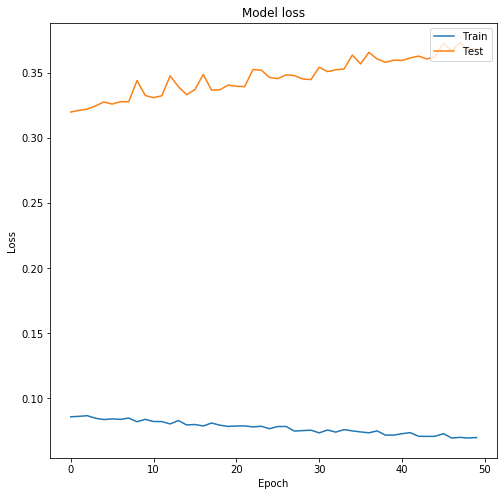

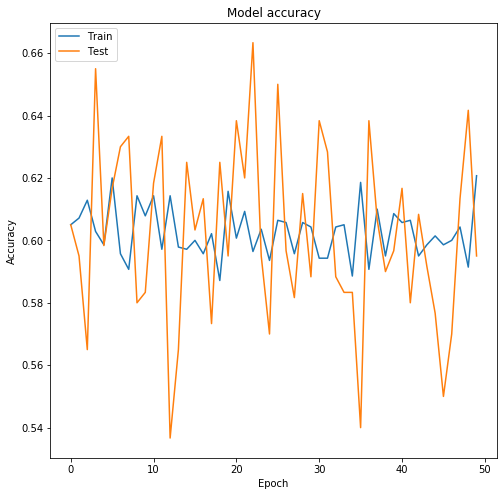

In [60]:
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
# 
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

### Early stopping your model
The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the `.fit()` method.

The `model` you built to detect fake dollar bills is loaded for you to train, this time with early stopping. `X_train`, `y_train`, `X_test` and `y_test` are also available for you to use.

In [61]:
# Normlize the data
X = banknotes.iloc[:, :4]
X = ((X - X.mean()) / X.std()).to_numpy()
y = banknotes['class'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [62]:
# Create a sequential model
model = Sequential()

# Add a dense layer
model.add(Dense(1, input_shape=(4, ), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=5)

# Train your model using early stopping callback
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), 
          callbacks=[monitor_val_acc]);

Epoch 1/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.9388 - val_loss: 0.3467 - val_accuracy: 0.9359
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.9407 - val_loss: 0.3383 - val_accuracy: 0.9359
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.9407 - val_loss: 0.3304 - val_accuracy: 0.9388
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.9407 - val_loss: 0.3231 - val_accuracy: 0.9417
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.9417 - val_loss: 0.3164 - val_accuracy: 0.9417
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.9427 - val_loss: 0.3101 - val_accuracy: 0.9446
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.9436 - val_loss: 0.3041 - val_accuracy: 0.9475
Epoch 8/100
3

### A combination of callbacks
Deep learning models can take a long time to train, especially when you move to deeper architectures and bigger datasets. Saving your model every time it improves as well as stopping it when it no longer does allows you to worry less about choosing the number of epochs to train for. You can also restore a saved model anytime and resume training where you left it.

Use the `EarlyStopping()` and the `ModelCheckpoint()` callbacks so that you can go eat a jar of cookies while you leave your computer to work!

In [65]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=3)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('./best_banknote_model.hdf5', save_best_only=True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                       epochs=100000000000,
                       callbacks=[monitor_val_acc, modelCheckpoint],
                       validation_data=(X_test, y_test))

Epoch 1/100000000000
33/33 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.9485 - val_loss: 0.2741 - val_accuracy: 0.9475
Epoch 2/100000000000
33/33 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.9495 - val_loss: 0.2699 - val_accuracy: 0.9475
Epoch 3/100000000000
33/33 [==============================] - 0s 2ms/step - loss: 0.2622 - accuracy: 0.9504 - val_loss: 0.2659 - val_accuracy: 0.9475
Epoch 4/100000000000
33/33 [==============================] - 0s 2ms/step - loss: 0.2583 - accuracy: 0.9504 - val_loss: 0.2620 - val_accuracy: 0.9504
Epoch 5/100000000000
33/33 [==============================] - 0s 2ms/step - loss: 0.2545 - accuracy: 0.9504 - val_loss: 0.2583 - val_accuracy: 0.9504
Epoch 6/100000000000
33/33 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.9504 - val_loss: 0.2547 - val_accuracy: 0.9504
Epoch 7/100000000000
33/33 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy:

In [67]:
!ls | grep best_banknote*

best_banknote_model.hdf5


Now you always save the model that performed best, even if you early stopped at one that was already performing worse.